In [1]:
from helpers import * 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('Consolidado Municipio.csv')

In [3]:
df1.head(10)

,COD_DANE_MUN,ANNOH,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
0,5000,1960,8,0,0,0,0
1,5000,1970,0,0,0,5,0
2,5000,1980,5,0,0,2,0
3,5000,1990,31,0,0,3,0
4,5000,2000,8,0,0,13,0
5,5000,2010,0,0,0,1,0
6,5001,1960,12,0,0,1,0
7,5001,1970,9,0,0,2,0
8,5001,1980,202,0,0,38,0
9,5001,1990,717,1,2,173,0


In [4]:
DATA_COLUMNS = df1.columns[2:]
DATA_COLUMNS

Index(['Desaparicion', 'Explosión mina antipersonal', 'Munición sin Explotar',
       'Secuestro a Civil', 'Secuestro a Combatiente'],
      dtype='object')

In [9]:
r2 = R_2(df1.loc[:, DATA_COLUMNS])
r2

array([0.35757686, 0.15475372, 0.09701577, 0.34415645, 0.00865208])

<AxesSubplot:>

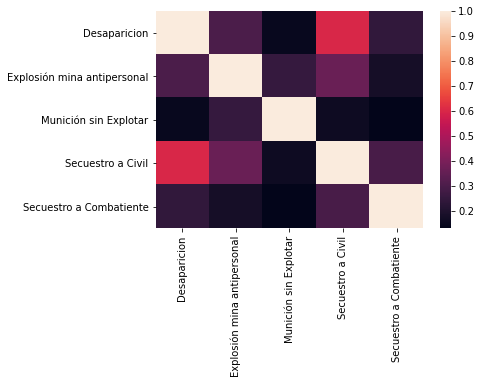

In [10]:
corr = df1.loc[:, DATA_COLUMNS].corr(method="spearman")
sns.heatmap(corr)

In [11]:
corr

,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
Desaparicion,1.000000,0.300141,0.147252,0.599098,0.241841
Explosión mina antipersonal,0.300141,1.000000,0.253512,0.365705,0.179148
Munición sin Explotar,0.147252,0.253512,1.000000,0.162099,0.129627
Secuestro a Civil,0.599098,0.365705,0.162099,1.000000,0.293631
Secuestro a Combatiente,0.241841,0.179148,0.129627,0.293631,1.000000


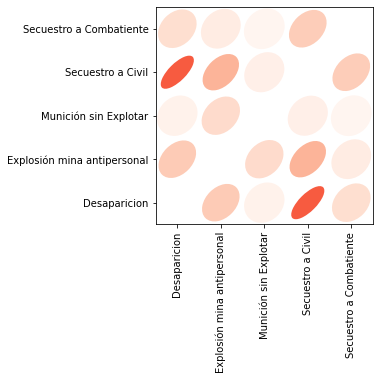

In [12]:
plot_corr_ellipses(corr,cmap='Reds')

In [13]:
np.linalg.det(df1.loc[:, DATA_COLUMNS].cov())

51162472.61105603

In [14]:
coor_p_df1 = corr_partial(df1.iloc[:, 2:])

<AxesSubplot:>

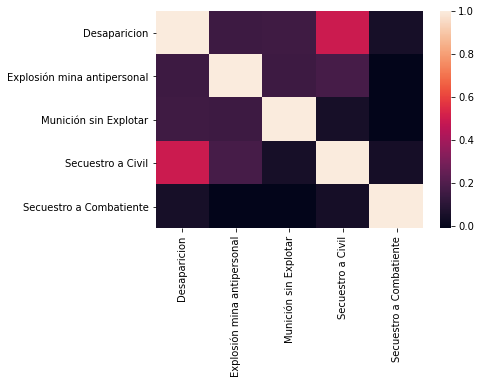

In [15]:
sns.heatmap(coor_p_df1)

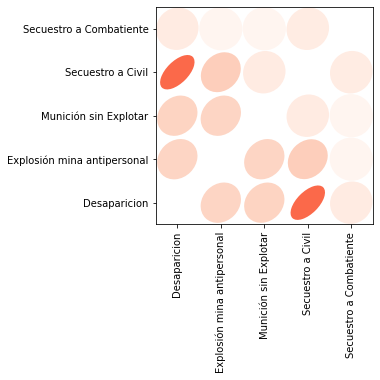

In [16]:
plot_corr_ellipses(coor_p_df1,cmap='Reds')

In [25]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet, LedoitWolf

empirical_cov = EmpiricalCovariance().fit(df1.loc[:, DATA_COLUMNS])

In [32]:
empirical_cov.location_

array([21.10645527,  1.54784824,  0.03340883,  9.51642129,  0.3788222 ])

<AxesSubplot:>

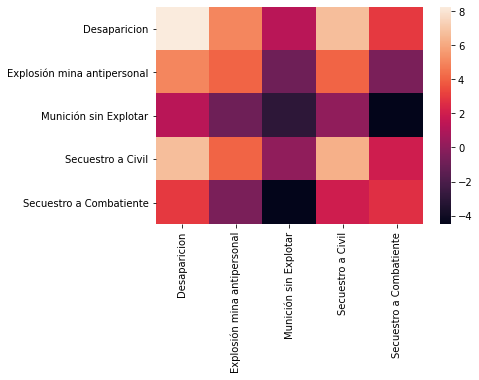

In [33]:
cov = pd.DataFrame(data=empirical_cov.covariance_, index=df1.loc[:, DATA_COLUMNS].columns, columns=DATA_COLUMNS)
sns.heatmap(np.log(cov))

In [34]:
cov

,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
Desaparicion,3879.420151,154.817386,3.720962,826.787323,19.702594
Explosión mina antipersonal,154.817386,59.067643,0.407235,58.781915,0.573607
Munición sin Explotar,3.720962,0.407235,0.050979,1.115533,0.010843
Secuestro a Civil,826.787323,58.781915,1.115533,552.915642,7.234719
Secuestro a Combatiente,19.702594,0.573607,0.010843,7.234719,14.982768


In [35]:
ledoit_cov = LedoitWolf().fit(df1.loc[:, DATA_COLUMNS])
cov = pd.DataFrame(data=ledoit_cov.covariance_, index=df1.loc[:, DATA_COLUMNS].columns, columns=DATA_COLUMNS)

In [36]:
cov

,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
Desaparicion,3747.513487,147.960256,3.556154,790.167478,18.829932
Explosión mina antipersonal,147.960256,96.371018,0.389198,56.178362,0.548201
Munición sin Explotar,3.556154,0.389198,39.968305,1.066124,0.010363
Secuestro a Civil,790.167478,56.178362,1.066124,568.345633,6.914281
Secuestro a Combatiente,18.829932,0.548201,0.010363,6.914281,54.238739


In [37]:
mcd_cov = MinCovDet().fit(df1.loc[:, DATA_COLUMNS])
cov = pd.DataFrame(data=mcd_cov.covariance_, index=df1.loc[:, DATA_COLUMNS].columns, columns=DATA_COLUMNS)

In [38]:
mcd_cov.location_

array([2.56979514, 0.19104335, 0.00952835, 1.38780372, 0.        ])

In [39]:
cov

,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
Desaparicion,7.505729,0.106009,-0.003047,0.827626,0.0
Explosión mina antipersonal,0.106009,0.737681,0.009137,0.166980,0.0
Munición sin Explotar,-0.003047,0.009137,0.016107,0.001545,0.0
Secuestro a Civil,0.827626,0.166980,0.001545,2.600442,0.0
Secuestro a Combatiente,0.000000,0.000000,0.000000,0.000000,0.0


In [40]:
df1

,COD_DANE_MUN,ANNOH,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente
0,5000,1960,8,0,0,0,0
1,5000,1970,0,0,0,5,0
2,5000,1980,5,0,0,2,0
3,5000,1990,31,0,0,3,0
4,5000,2000,8,0,0,13,0
...,...,...,...,...,...,...,...
3527,99624,2000,4,0,0,0,0
3528,99773,1980,20,0,0,3,0
3529,99773,1990,37,0,0,8,6
3530,99773,2000,136,0,0,42,0


In [41]:
df1["dist"] = mcd_cov.dist_

In [42]:
def mahal(vec):
    return (vec- mcd_cov.location_)  \
            @ mcd_cov.precision_ \
            @ (vec - mcd_cov.location_)

def dimension_minimum(idx, dim):
    vec = df1.iloc[idx, 2:-1].values.copy()
    left = 0
    right = 5000
    while abs(right - left) >= 1e-1:
        left_third = left + (right - left) / 3
        right_third = right - (right - left) / 3

        vec[dim] = left_third
        f_left_third = mahal(vec)
        #print(vec, f_left_third)
        vec[dim] = right_third
        f_right_third = mahal(vec)
        if f_left_third > f_right_third:
            left = left_third
        else:
            right = right_third
    
    ans = (left + right) / 2
    vec[dim] = (left + right) / 2
    f_ans = mahal(vec)
    return ans, f_ans

def outlying_dimension(idx):
    max_dist = mahal(vec = df1.iloc[idx, 2:-1].values)
    
    for i in range(5):
        val, dist = dimension_minimum(idx, i)
        percentage = 100 * (max_dist-dist) / max_dist
        print(f"{val:.1f} {percentage:.2f}%")

In [47]:
outlying_dimension(10)

70.4 92.48%
25.0 0.29%
0.0 0.18%
147.3 0.84%
0.0 0.00%


In [46]:
df1.nlargest(20, "dist")

,COD_DANE_MUN,ANNOH,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente,dist
10,5001,2000,1359,2,2,219,2,248094.162909
455,5837,1990,1052,2,0,74,8,147637.070533
2505,54810,2000,886,72,0,64,1,109675.806483
62,5055,2000,156,35,1,515,0,101489.166391
2016,47001,2000,796,1,0,98,0,84084.267835
2216,50711,2000,534,160,0,176,1,72156.242386
9,5001,1990,717,1,2,173,0,72107.982416
3490,95001,2000,715,35,1,99,0,68590.753283
1256,20001,2000,485,4,0,310,4,57498.094391
3335,81794,2000,357,164,2,129,2,52216.754452


In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
X = StandardScaler().fit_transform(df1.loc[:, DATA_COLUMNS])
pca.fit(X)

pca.explained_variance_ratio_

array([0.40002697, 0.20058997])

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

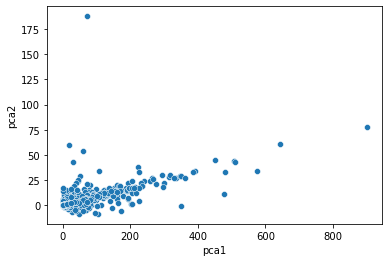

In [50]:
reduced_data = pca.transform(df1.loc[:, DATA_COLUMNS])
df1["pca1"] = reduced_data[:, 0]
df1["pca2"] = reduced_data[:, 1]

sns.scatterplot(data=df1, x="pca1", y="pca2")

In [57]:
drop_index = df1[df1.dist >= df1.dist.quantile(0.99)].index

In [58]:
df1.drop(drop_index, inplace=True)

In [60]:
pca = PCA(n_components=2)
X = StandardScaler().fit_transform(df1.loc[:, DATA_COLUMNS])
pca.fit(X)

pca.explained_variance_ratio_

array([0.37308994, 0.20449797])

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

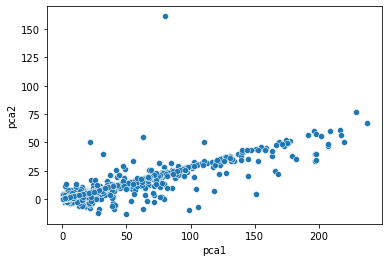

In [61]:
reduced_data = pca.transform(df1.loc[:, DATA_COLUMNS])
df1["pca1"] = reduced_data[:, 0]
df1["pca2"] = reduced_data[:, 1]

sns.scatterplot(data=df1, x="pca1", y="pca2")

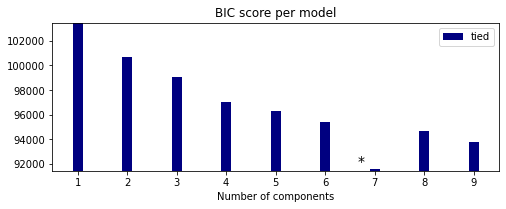

In [80]:
import itertools
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
#cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        X = df1.loc[:, DATA_COLUMNS]
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) #+ .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [89]:
GM = GaussianMixture(n_components=7, covariance_type="tied", reg_covar=1e-4)
GM.fit(df1.loc[:, DATA_COLUMNS])
GM.converged_

True

In [90]:
(100 * GM.weights_).round()

array([ 6., 85.,  1.,  3.,  1.,  1.,  3.])

In [94]:
for x in GM.means_:
    for y in x:
        print(f"{y:4.0f}", end=" ")
    print()

  50    3    0   15    1 
   5    1    0    4    0 
  89   14    0  133    1 
 102    9    0   25    3 
 275    8    0   41    1 
 183    6    0   43    1 
  35    2    0   56    2 


In [93]:
for x in GM.covariances_:
    for y in x:
        print(f"{y:5.0f}", end=" ")
    print()

  104    -0    -0    25    -2 
   -0    29     0     8    -1 
   -0     0     0     0    -0 
   25     8     0    69     0 
   -2    -1    -0     0    15 


In [118]:
#for x in GM.covariances_:
#    for y in x:
#        for z in y:
#            print(f"{z:10.4f}", end=" ")
#        print()
#    print()

In [95]:
df1["cluster"] = GM.predict(df1.loc[:, DATA_COLUMNS])
df1["cluster"] = df1.cluster.apply(str)

In [96]:
df1.groupby("cluster").size()

cluster
0     213
1    2983
2      24
3     109
4      21
5      46
6     100
dtype: int64

In [97]:
df1.groupby("cluster").sample(5, replace=True)

,COD_DANE_MUN,ANNOH,Desaparicion,Explosión mina antipersonal,Munición sin Explotar,Secuestro a Civil,Secuestro a Combatiente,dist,pca1,pca2,cluster
2624,68001,1980,78,0,0,22,0,823.980263,57.891533,16.461462,0
568,11001,2010,42,0,0,5,0,208.050901,27.132066,7.868250,0
3045,73443,2000,71,1,0,20,1,673.694726,53.283988,15.453507,0
3248,76563,2000,38,9,0,10,0,265.145589,31.954041,5.287507,0
3497,95025,1990,65,0,0,8,12,520.891507,43.814866,21.395851,0
556,8770,1990,6,0,0,0,0,2.835645,3.454470,1.020160,1
3356,85136,1980,1,0,0,0,0,0.932535,0.575745,0.170027,1
2649,68092,2000,9,0,0,1,0,6.052007,5.771860,1.675666,1
2380,52788,2010,0,0,0,2,0,1.264920,1.180312,0.290853,1
2807,68679,1970,1,0,0,0,0,0.932535,0.575745,0.170027,1


In [98]:
pca = PCA(n_components=2)
X = StandardScaler().fit_transform(df1.loc[:, DATA_COLUMNS])
pca.fit(X)

PCA(n_components=2)

In [99]:
pca.explained_variance_ratio_

array([0.37308994, 0.20449797])

In [100]:
reduced_data = pca.transform(df1.loc[:, DATA_COLUMNS])
df1["pca1"] = reduced_data[:, 0]
df1["pca2"] = reduced_data[:, 1]

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

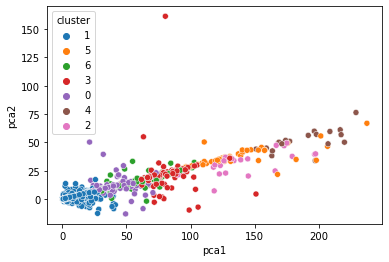

In [101]:
sns.scatterplot(data=df1, x="pca1", y="pca2", hue="cluster")

In [103]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, early_exaggeration=10, learning_rate=1000)
X = StandardScaler().fit_transform(df1.loc[:, DATA_COLUMNS])
reduced_data = tsne.fit_transform(X)
df1["tsne1"] = reduced_data[:, 0]
df1["tsne2"] = reduced_data[:, 1]

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

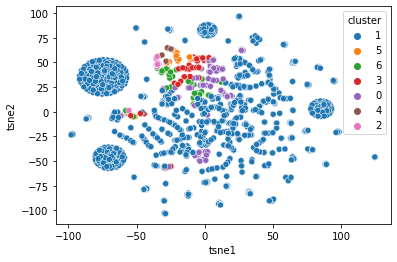

In [104]:
sns.scatterplot(data=df1, x="tsne1", y="tsne2", hue="cluster")